# **Salary Prediction Based on Job Features - Part 2**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# **More Data Cleaning**

**Part 1 - Major Cleaning**

In [65]:
#https://colab.research.google.com/drive/1bwqo_WDEhQ77bPLfLgtkRf8w1tVn9fDJ?usp=sharing

**Part 2**

In [66]:
jb = pd.read_csv('jobs_2.csv')

In [67]:
jobs = jb.copy()
print(jb.shape)
jb.head()

(7931, 9)


,title,work_type,application_type,experience,city,skill,benefit,industry,yearly_salary
0,Licensed Insurance Agent,Full-time,ComplexOnsiteApply,Executive,Chico,SALE,Basic,Insurance,48880
1,Sales Manager,Full-time,ComplexOnsiteApply,Mid-Senior level,Santa Clarita,SALE,Basic,Transportation/Trucking/Railroad,124065
2,Business Manager,Full-time,ComplexOnsiteApply,Internship,Forney,MNFC,Premium,Religious Institutions,80080
3,Office Associate,Full-time,ComplexOnsiteApply,Executive,Albany,ADM,Premium,Retail,39500
4,Education Manager,Full-time,OffsiteApply,Executive,United States,EDU,Premium,Computer Software,53500


In [68]:
# Remove irrelevant columns
# since salary has been standardized to yearly basis, work_type is now yearly
# over 90% of the dataset is for jobs in the US, will drop city and adopt general US location
jobs.drop(columns=['work_type', 'application_type', 'city', 'skill'], axis=0, inplace=True)
print(jobs.shape)
jobs.head()

(7931, 5)


,title,experience,benefit,industry,yearly_salary
0,Licensed Insurance Agent,Executive,Basic,Insurance,48880
1,Sales Manager,Mid-Senior level,Basic,Transportation/Trucking/Railroad,124065
2,Business Manager,Internship,Premium,Religious Institutions,80080
3,Office Associate,Executive,Premium,Retail,39500
4,Education Manager,Executive,Premium,Computer Software,53500


In [69]:
#rearrange columns
jobs= jobs[['title',	'industry', 'experience', 'benefit', 'yearly_salary']]

In [70]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7931 entries, 0 to 7930
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          7931 non-null   object
 1   industry       7931 non-null   object
 2   experience     7931 non-null   object
 3   benefit        7931 non-null   object
 4   yearly_salary  7931 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 309.9+ KB


In [71]:
# Check slaries below $10,000
filtered_jobs = jobs[jobs['yearly_salary'] < 10000]
filtered_jobs

,title,industry,experience,benefit,yearly_salary
65,Senior Business Intelligence Developer,Information Technology & Services,Executive,Premium,125
202,Customer Service Representative,Wholesale,Entry level,Premium,16
256,Data Analyst,Information Technology & Services,Associate,Premium,36
283,Accreditation Coordinator,Staffing & Recruiting,Entry level,Premium,17
534,Gaming Business Analyst,Information Technology & Services,Mid-Senior level,Premium,98
733,Contract Agent,Staffing & Recruiting,Entry level,Premium,27
794,Associate Director Marketing Asset Management,Marketing & Advertising,Associate,Basic,120
814,Inventory Specialist,"Health, Wellness & Fitness",Executive,Basic,45
875,Senior Network Engineer,Staffing & Recruiting,Mid-Senior level,Premium,135
978,Senior Network Administrator,Staffing & Recruiting,Mid-Senior level,Basic,45


In [72]:
# remove slaries below $10,000
jobs = jobs[jobs['yearly_salary'] >= 10000]
jobs.shape

(7888, 5)

In [73]:
#check single entries by title column
count = jobs['title'].value_counts()
count_of_ones = count[count == 1]
print(count_of_ones)
print(count_of_ones.sum())

Executive Assistant $100K                                            1
Experienced Fire Alarm Inspector                                     1
Mechanical Engineer II (R&D)                                         1
RN Registered Nurse Emergency Room                                   1
Product Manager, In Market Math Products                             1
                                                                    ..
Security Systems Administrator                                       1
Associate Director, Advanced Analytics (Oncology)                    1
Senior Vice President, Total Rewards – Global Practices & Sectors    1
Managing Director                                                    1
MRI Manager                                                          1
Name: title, Length: 3569, dtype: int64
3569


In [74]:
#drop titles that have 1 entries, they are likely very specific

title_count = jobs['title'].value_counts()
titles_to_keep = title_count[title_count > 1].index
jobs = jobs[jobs['title'].isin(titles_to_keep)]

In [75]:
print(jobs.shape)
jobs.head()

(4319, 5)


,title,industry,experience,benefit,yearly_salary
0,Licensed Insurance Agent,Insurance,Executive,Basic,48880
1,Sales Manager,Transportation/Trucking/Railroad,Mid-Senior level,Basic,124065
2,Business Manager,Religious Institutions,Internship,Premium,80080
3,Office Associate,Retail,Executive,Premium,39500
4,Education Manager,Computer Software,Executive,Premium,53500


In [76]:
#check single entries by industry column
count_3 = jobs['industry'].value_counts()
counting = count_3[count_3 == 1]
print(counting)
print(counting.sum())

Shipbuilding                     1
Sports                           1
Online Media                     1
Business Supplies & Equipment    1
Performing Arts                  1
Wireless                         1
Farming                          1
Market Research                  1
Railroad Manufacture             1
Religious Institutions           1
Commercial Real Estate           1
Sporting Goods                   1
Political Organization           1
Computer Hardware                1
Photography                      1
Newspapers                       1
Writing & Editing                1
Gambling & Casinos               1
Government Relations             1
Name: industry, dtype: int64
19


In [77]:
#drop industries that have 1 entries, they are likely very specific

ind_count = jobs['industry'].value_counts()
ind_to_keep = ind_count[ind_count > 1].index
jobs = jobs[jobs['industry'].isin(ind_to_keep)]
jobs.shape

(4300, 5)

In [78]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 7928
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          4300 non-null   object
 1   industry       4300 non-null   object
 2   experience     4300 non-null   object
 3   benefit        4300 non-null   object
 4   yearly_salary  4300 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 201.6+ KB


In [79]:
# Convert to correct data types
categorical = ['title', 'industry', 'experience',	'benefit']

for i in categorical:
  jobs[i] = jobs[i].astype('category')

<ipython-input-79-f21b6a454cab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs[i] = jobs[i].astype('category')
<ipython-input-79-f21b6a454cab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs[i] = jobs[i].astype('category')
<ipython-input-79-f21b6a454cab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [80]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 7928
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   title          4300 non-null   category
 1   industry       4300 non-null   category
 2   experience     4300 non-null   category
 3   benefit        4300 non-null   category
 4   yearly_salary  4300 non-null   int64   
dtypes: category(4), int64(1)
memory usage: 130.7 KB


In [81]:
# Check for duplicates
duplicate_rows = jobs.duplicated()
duplicate_rows.value_counts()

False    3041
True     1259
dtype: int64

In [82]:
# drop duplicates
jobs = jobs[~duplicate_rows]
jobs.duplicated().value_counts()

False    3041
dtype: int64

In [83]:
jobs['benefit'].unique()

['Basic', 'Premium', 'Standard']
Categories (3, object): ['Basic', 'Premium', 'Standard']

In [84]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041 entries, 0 to 7928
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   title          3041 non-null   category
 1   industry       3041 non-null   category
 2   experience     3041 non-null   category
 3   benefit        3041 non-null   category
 4   yearly_salary  3041 non-null   int64   
dtypes: category(4), int64(1)
memory usage: 104.9 KB


# **Exploratory Data Analysis**

In [85]:
jobs.describe()

,yearly_salary
count,3.041000e+03
mean,8.752279e+04
std,5.827142e+04
min,1.100000e+04
25%,5.189500e+04
50%,7.716500e+04
75%,1.100000e+05
max,1.755346e+06


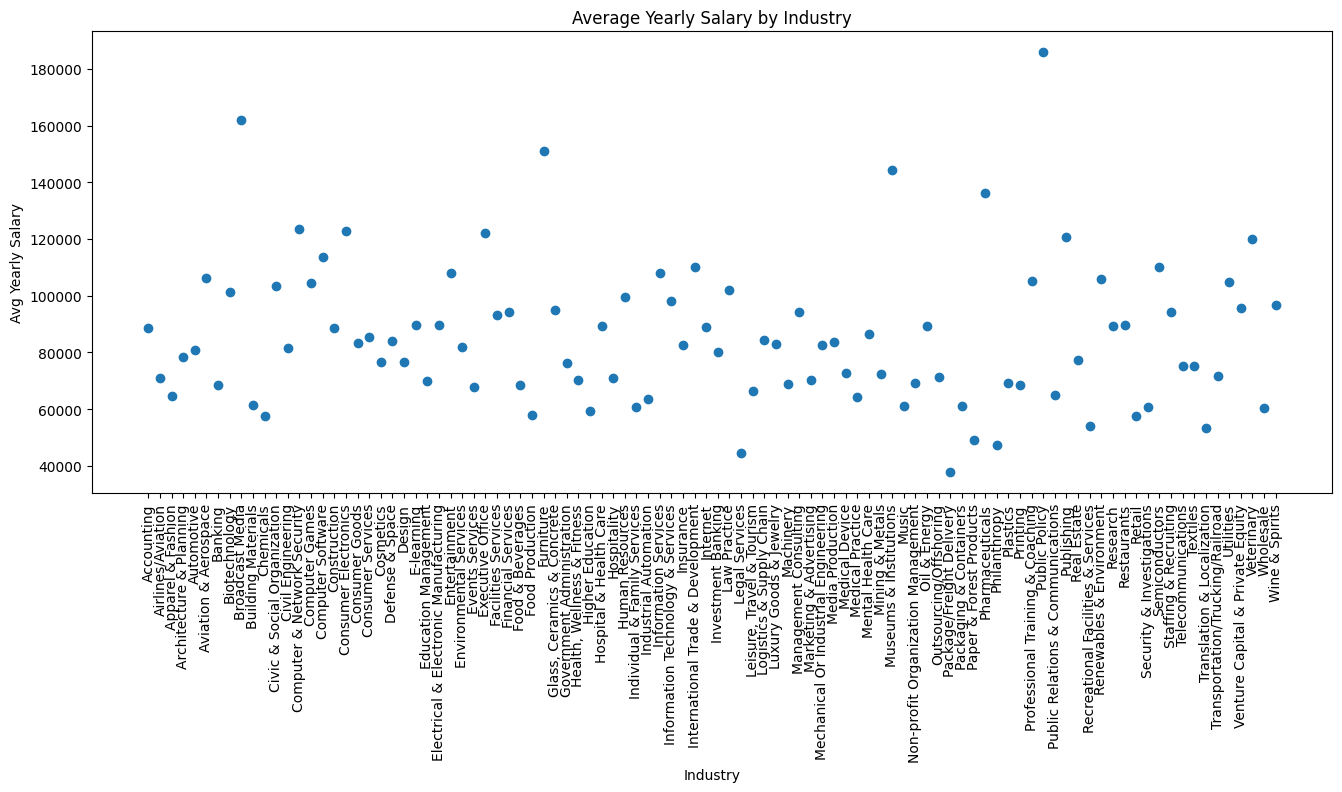

In [86]:
grouped_data = jobs.groupby('industry')['yearly_salary'].mean().reset_index()

plt.figure(figsize=(16, 6))
plt.scatter(grouped_data['industry'], grouped_data['yearly_salary'])
plt.xlabel('Industry')
plt.ylabel('Avg Yearly Salary')
plt.xticks(rotation=90)
plt.title('Average Yearly Salary by Industry')
plt.show()

Above scatter plot does not show alot of information.

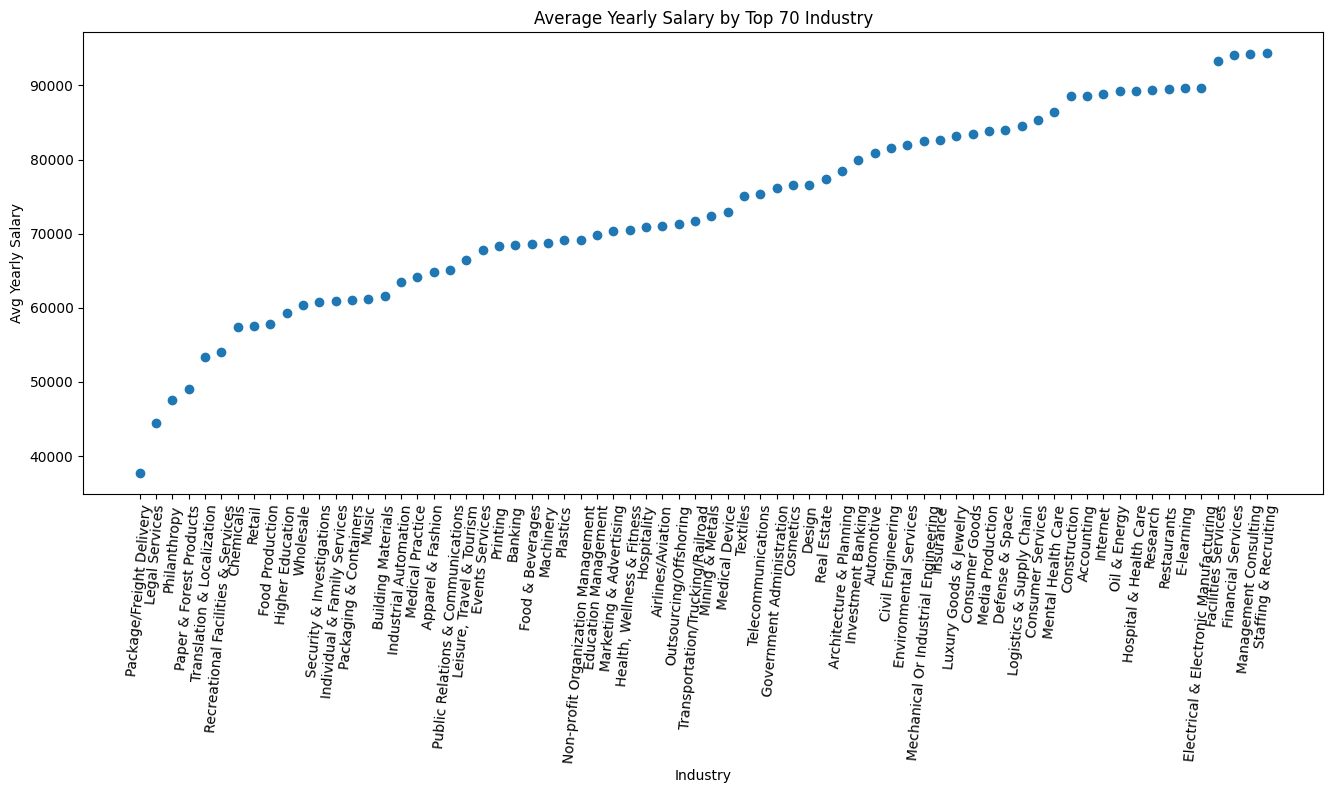

In [87]:
grouped_data = jobs.groupby('industry')['yearly_salary'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='yearly_salary')
top_n = 70
top_n_data = grouped_data.head(top_n)

plt.figure(figsize=(16, 6))
plt.scatter(top_n_data['industry'], top_n_data['yearly_salary'])
plt.xlabel('Industry')
plt.ylabel('Avg Yearly Salary')
plt.xticks(rotation=85)
plt.title('Average Yearly Salary by Top {} Industry'.format(top_n))
plt.show()

Above chart shows that the highest paying industry is Internet (Online Media)

<function matplotlib.pyplot.show(close=None, block=None)>

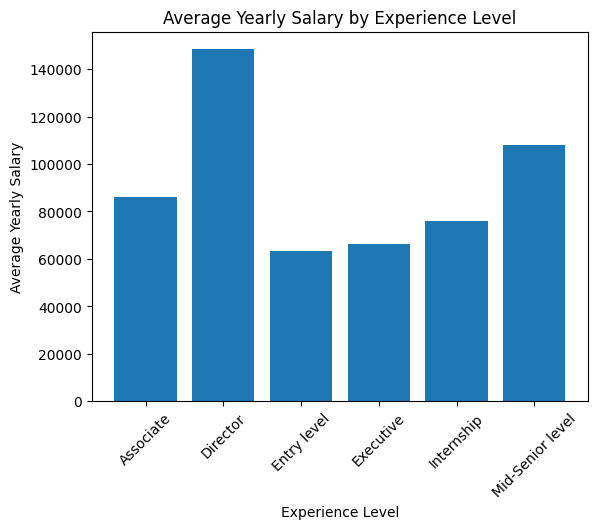

In [88]:
data = jobs.groupby('experience')['yearly_salary'].mean().reset_index()

plt.bar(data['experience'], data['yearly_salary'])
plt.xlabel('Experience Level')
plt.ylabel('Average Yearly Salary')
plt.xticks(rotation=45)
plt.title('Average Yearly Salary by Experience Level')
plt.show

The barchart above does not show a normal salary flow because it indicates that the average salary of an Entry Level is same as an Executive. This may be due to the presence of smaller companies that have lower pay in the dataset.

Text(0.5, 1.0, 'Distribution of Salary')

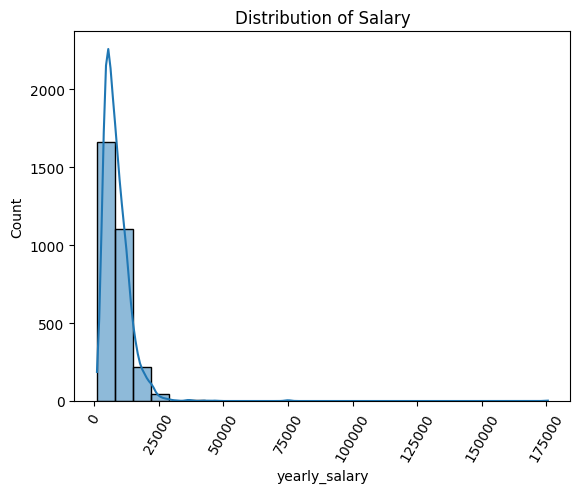

In [89]:
sns.histplot(jobs['yearly_salary']/10, bins=25, kde=True)
plt.xticks(rotation=60)
plt.title('Distribution of Salary')

The above histogram shows a right-skewed distribution with majority of the data points are concentrated on the left side (lower values) of the distribution.

This is not uncommon for salary distributions as salaries tend to increase with experience and seniority. This leads to a concentration of individuals with lower salaries and a smaller number of highly experienced professionals with higher salaries.

## **Data Encoding**

https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f

https://towardsdatascience.com/6-ways-to-encode-features-for-machine-learning-algorithms-21593f6238b0

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/


In [90]:
!pip install category_encoders
import category_encoders as ce

**One-hot/Dummy Encoding**

This categorical data encoding technique when the features are nominal(do not have any order). A Binary Column is created for each Unique Category in the variable.

If a category is present in a sample, the corresponding column is set to 1, and all other columns are set to 0.

These newly created binary features are known as Dummy variables.

In one-hot encoding, for N categories in a variable, it uses N binary variables.

Dummy encoding is a small improvement over one-hot-encoding. It uses N-1 features to represent N labels/categories.


In [91]:
# https://drive.google.com/file/d/11ZXkDx_rzqkgAfXIyLknF6KVmn2spa-A/view?usp=sharing

#categorical_2 = ['work_type',	'application_type',	'skill',	'benefit']
#for FEATURES in categorical_2:
    #jobs = pd.concat([jobs, pd.get_dummies(jobs[FEATURES], drop_first=True, prefix=FEATURES)], axis=1).drop([FEATURES], axis=1)
jobs = pd.concat([jobs, pd.get_dummies(jobs['benefit'], drop_first=True, prefix='benefit')], axis=1).drop(['benefit'], axis=1)

In [92]:
jobs.head()

,title,industry,experience,yearly_salary,benefit_Premium,benefit_Standard
0,Licensed Insurance Agent,Insurance,Executive,48880,0,0
1,Sales Manager,Transportation/Trucking/Railroad,Mid-Senior level,124065,0,0
3,Office Associate,Retail,Executive,39500,1,0
4,Education Manager,Computer Software,Executive,53500,1,0
5,Civil Engineer,Architecture & Planning,Executive,62030,1,0


**Binary Encoding**

This is similar to One-Hot Encoding, but instead of creating a separate column for each category, the categories are represented as binary digits.

It is primarily used for nominal (unordered) categorical features. It is a dimensionality reduction technique that can be useful for high-cardinality features but may not capture category-target relationships.

In [93]:
data = jobs['title']

#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['title'],return_df=True)

#Fit and Transform Data
data_encoded=encoder.fit_transform(data)
data_encoded

,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7918,0,1,1,1,1,1,0,0,1,0
7919,0,1,1,0,0,1,0,0,0,1
7920,1,1,1,0,0,0,0,0,0,1
7925,0,0,1,0,1,1,0,1,0,1


In [94]:
jobs = pd.concat([jobs, data_encoded], axis=1).drop('title', axis=1)

In [95]:
jobs.head()

,industry,experience,yearly_salary,benefit_Premium,benefit_Standard,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9
0,Insurance,Executive,48880,0,0,0,0,0,0,0,0,0,0,0,1
1,Transportation/Trucking/Railroad,Mid-Senior level,124065,0,0,0,0,0,0,0,0,0,0,1,0
3,Retail,Executive,39500,1,0,0,0,0,0,0,0,0,0,1,1
4,Computer Software,Executive,53500,1,0,0,0,0,0,0,0,0,1,0,0
5,Architecture & Planning,Executive,62030,1,0,0,0,0,0,0,0,0,1,0,1


**Target Encoding**

This is a more advanced encoding technique used for dealing with high cardinality categorical features.

It is suitable for capturing the relationship between categorical features and the target variable (but can lead to overfitting if not used with caution). It is primarily used for encoding categorical features when the target variable is available.

The target variable here is yearly salary.


In [96]:
data2 = jobs[['industry']]

encoder2 = ce.TargetEncoder(cols=['industry'])
data_encoded2 = encoder2.fit_transform(data2, jobs['yearly_salary'])

data_encoded2

,industry
0,83665.815801
1,71999.522345
3,57594.538033
4,113532.359622
5,84710.357903
...,...
7918,94341.564802
7919,89217.062652
7920,94341.564802
7925,94115.390896


In [97]:
jobs = jobs.drop(['industry'], axis=1)
jobs = pd.concat([jobs, data_encoded2], axis=1)

In [98]:
jobs.head()

,experience,yearly_salary,benefit_Premium,benefit_Standard,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,industry
0,Executive,48880,0,0,0,0,0,0,0,0,0,0,0,1,83665.815801
1,Mid-Senior level,124065,0,0,0,0,0,0,0,0,0,0,1,0,71999.522345
3,Executive,39500,1,0,0,0,0,0,0,0,0,0,1,1,57594.538033
4,Executive,53500,1,0,0,0,0,0,0,0,0,1,0,0,113532.359622
5,Executive,62030,1,0,0,0,0,0,0,0,0,1,0,1,84710.357903


**Label Encoding or Ordinal Encoding**

Label Encoding is a categorical data encoding technique that is used when the categorical feature is ordinal and it is important to retain this order. Each unique category is assigned a Unique Integer value.

Ordinal Encoding is used when the categories in a variable have a Natural Ordering. In this method, the categories are assigned a numerical value based on their order.

Label Encoding applies here.

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
le = LabelEncoder()
jobs['experience'] = le.fit_transform(jobs['experience'])

In [101]:
print(jobs.shape)
jobs.head()

(3041, 15)


,experience,yearly_salary,benefit_Premium,benefit_Standard,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,industry
0,3,48880,0,0,0,0,0,0,0,0,0,0,0,1,83665.815801
1,5,124065,0,0,0,0,0,0,0,0,0,0,1,0,71999.522345
3,3,39500,1,0,0,0,0,0,0,0,0,0,1,1,57594.538033
4,3,53500,1,0,0,0,0,0,0,0,0,1,0,0,113532.359622
5,3,62030,1,0,0,0,0,0,0,0,0,1,0,1,84710.357903


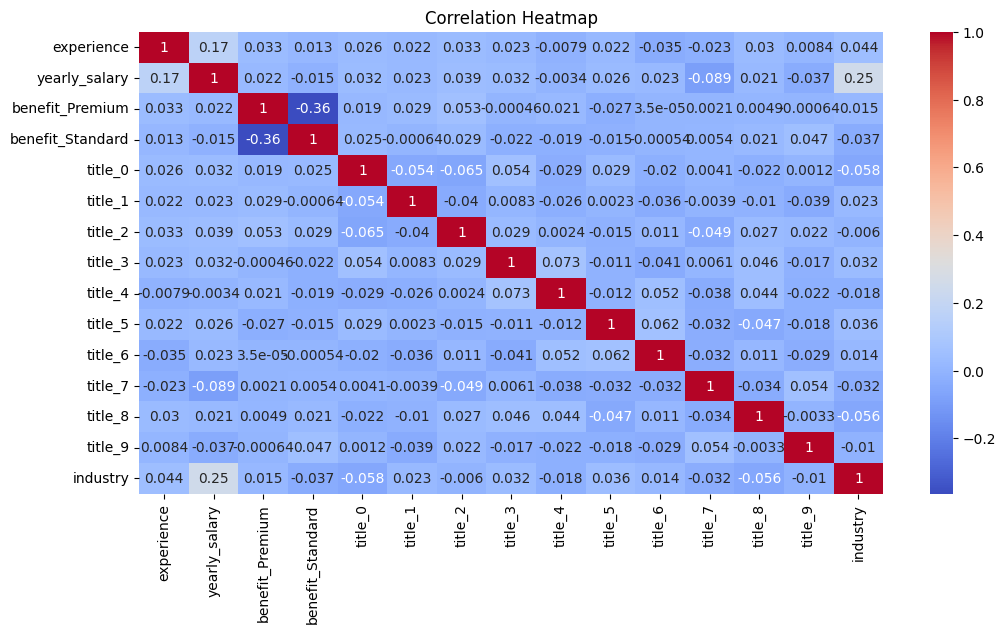

In [102]:
correlation_matrix = jobs.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Model Selection**

In [103]:
# Import Libraries
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a Regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [104]:
X = jobs.drop(['yearly_salary'], axis=1)
y = jobs['yearly_salary']

X.head()

,experience,benefit_Premium,benefit_Standard,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,industry
0,3,0,0,0,0,0,0,0,0,0,0,0,1,83665.815801
1,5,0,0,0,0,0,0,0,0,0,0,1,0,71999.522345
3,3,1,0,0,0,0,0,0,0,0,0,1,1,57594.538033
4,3,1,0,0,0,0,0,0,0,0,1,0,0,113532.359622
5,3,1,0,0,0,0,0,0,0,0,1,0,1,84710.357903


In [105]:
#spliting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [106]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
# Implement Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)

# Implement Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement K-Nearest Neighbors (KNN) Regression
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=60)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Implement Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(n_estimators=60, learning_rate=0.1)
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

In [108]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

In [109]:
evaluate_model(y_test, y_pred_linear_reg, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

Linear Regression - Mean Squared Error: 2401647336.642781
Linear Regression - R-squared (R²): 0.1360377126880037

Decision Tree - Mean Squared Error: 2107426483.5121782
Decision Tree - R-squared (R²): 0.24187994746046537

K-Nearest Neighbors (KNN) - Mean Squared Error: 4733189714.962234
K-Nearest Neighbors (KNN) - R-squared (R²): -0.7027052015624997

Random Forest - Mean Squared Error: 9418469321.46659
Random Forest - R-squared (R²): -2.3881753468962637

Gradient Boosting - Mean Squared Error: 2119857504.109589
Gradient Boosting - R-squared (R²): 0.23740804485216038



# **Feature Imporance**

Ranking - Recursive Feature Elimination (RFE):

In [110]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)
ranking = fit.ranking_

# Print the ranking for each feature
for feature, rank in zip(X.columns, ranking):
    print(f"Feature: {feature}, Rank: {rank}")

Feature: experience, Rank: 2
Feature: benefit_Premium, Rank: 12
Feature: benefit_Standard, Rank: 4
Feature: title_0, Rank: 5
Feature: title_1, Rank: 9
Feature: title_2, Rank: 6
Feature: title_3, Rank: 7
Feature: title_4, Rank: 13
Feature: title_5, Rank: 10
Feature: title_6, Rank: 8
Feature: title_7, Rank: 1
Feature: title_8, Rank: 11
Feature: title_9, Rank: 3
Feature: industry, Rank: 14


Feature Importance - Tree-Based Models:

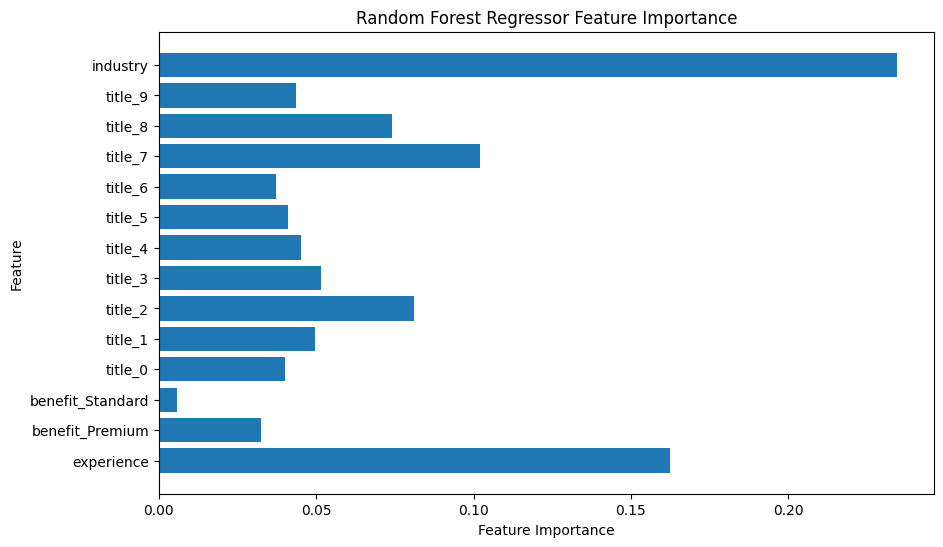

In [111]:
#Random Forest Regressor model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.show()